# **Série de Travaux Pratiques N° 4 : Regréssion Multiple et Regréssion Polynomiale**

# **Partie I : Regréssion Multiple**

- La régression multiple est comme la régression linéaire, mais avec plus d'une valeur indépendante, ce qui signifie que nous essayons de prédire une valeur basée sur deux variables ou plus.

- L’ensemble de données ci-dessous contient des informations sur les voitures.
- Nous pouvons prédire les émissions de CO2 d’une voiture en fonction de la taille du moteur, mais avec la régression multiple, nous pouvons intégrer davantage de variables, comme le poids de la voiture, pour rendre la prédiction plus précise.

### **Question 1**

1)- Lisez le fichier "data.csv"renvoyez un objet DataFrame et afficher le dataset avec head()

In [3]:
#Utiliser la bibliothèque 
import numpy as np
import pandas as pd
###
import matplotlib.pyplot as plt


**Pandas** offre des fonctions pour lire et écrire des données à partir de divers formats de fichiers, tels que CSV, Excel, SQL, etc. 
**

In [4]:
# Lire le fichier CSV et créer un DataFrame
data = pd.read_csv("data.csv")
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


### **Question 2**

2)- Faites ensuite une dataframe des valeurs indépendantes (Volume et Weight) et appelez cette variable X.

In [5]:
#x comme variables d'entrées
# Sélectionner les colonnes "Volume" et "Weight" 
X = data[['Volume', 'Weight']]
# Afficher les premières
X.head()

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140


### **Question 3**

3)- Mettez les valeurs dépendantes (CO2) dans une variable appelée y.






In [6]:
#y comme cible
y = data['CO2']
y.head()

0     99
1     95
2     95
3     90
4    105
Name: CO2, dtype: int64

 **Question 4**

4)- À partir du module sklearn, utlisez la méthode LinearRegression() pour créer un objet de régression linéaire.

La méthode LinearRegression()  est utilisée pour créer un objet de régression linéaire. 
Ce modèle est utilisé pour modéliser la relation linéaire entre une variable dépendante (cible) et une ou plusieurs variables indépendantes (caractéristiques). Voici une explication de la création de cet objet et de son utilisation :

In [7]:
from sklearn.linear_model import LinearRegression
# Créer un objet de régression linéaire
regression = LinearRegression()


### **Question 5**

 5)- Cet objet possède une méthode appelée fit() qui prend les valeurs indépendantes **X** et dépendantes **y** comme paramètres et remplit l'objet de régression avec des données décrivant la relation :

 Une fois que vous avez créé l'objet de régression linéaire, vous pouvez l'utiliser pour entraîner un modèle sur vos données en utilisant la méthode fit().

In [8]:
# Entraîner les donnees
regression.fit(X, y)

LinearRegression()

### **Question 6**

6)- Nous disposons désormais d'un objet de régression prêt à prédire les valeurs de CO2 en fonction du poids et du volume d'une voiture. On veut prédire combien de grammes de CO2 est dégagés pour chaque kilomètre parcouru pour une voiture équipée d’un moteur de 1,3 litre (1300 ml) et pesant 2300 kg (utiliser la fonction predict).

In [9]:
# Créer un tableau numpy avec les valeurs de volume et de poids pour la voiture à prédire
new_data = [[1300, 2300]]
y_CO2 = regression.predict(new_data)
y_CO2

c:\Users\Maryam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([107.2087328])

### **Question 7**

7)- Le coefficient est un facteur qui décrit la relation avec une variable inconnue.


Dans ce cas, on peut demander la valeur du coefficient poids par rapport au CO2, et du volume par rapport au CO2. La ou les réponses que nous obtenons nous indiquent ce qui se passerait si nous augmentions ou diminuions l’une des valeurs indépendantes.

In [10]:
#retrouver les coefficines et l'ordonnées a l origine
#Ces résultats vous donnent les paramètres de votre modèle de régression linéaire
print(regression.coef_) #a
print(regression.intercept_)#b              
#il y a deux coefficients car vous avez deux variables indépendantes (Volume et Weight).


[0.00780526 0.00755095]
79.69471929115939


# **Partie II : Regréssion Polynomiale**

### **Question 1**

1- Importer les librairies : numpy, matplotlib, sklearn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Question 2**

2- Créer votre dataset en important la fonction datasets.make_regression et utilisez la pour générer un problème de régression aléatoire de 100 exemples avec une seule variable avec y=x^2

In [23]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

X, y = make_regression(n_samples=100, n_features=1, noise=5)
y= y**2

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X = poly_features.fit_transform(X)


### **Question 3**

3- Visualiser vos données en utilisant la fonction plt.scatter(x, y).

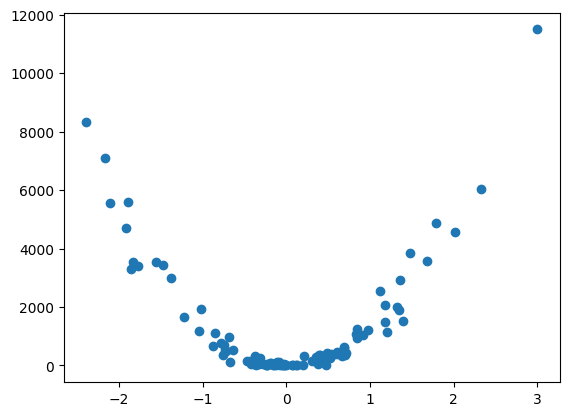

In [24]:
#Visualisation des données
plt.scatter(X[:,0], y)


### **Question 4**

4- Définir votre modèle avec SGDRegressor() sur 100 itérations avec un Learning rate de 0.0001.

In [25]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.0001)
model.fit(X, y)

# Affichage des coefficients du modèle
print("Coefficients du modèle:", model.coef_)
print("Intercept du modèle:", model.intercept_)


Coefficients du modèle: [ -31.50663811 1184.25107001]
Intercept du modèle: [203.91758467]


c:\Users\Maryam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### **Question 5**

5- Entraîner votre modèle en utilisant la méthode fit().

In [26]:
# Entraîner le modèle
model.fit(X, y)


c:\Users\Maryam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=100)

### **Question 6**

6- Calculer la précision de votre modèle en utilisant la fonction score qui calcule le coefficient de détermination entre le modèle et les valeurs y de votre Dataset.

In [27]:
# Calculer la précision du modèle
precision = model.score(X, y)
print("Précision du modèle :", precision)


Précision du modèle : 0.9552775709598966


### **Question 7**

7- Faire de nouvelles prédictions avec la fonction predict() et tracer les résultats.

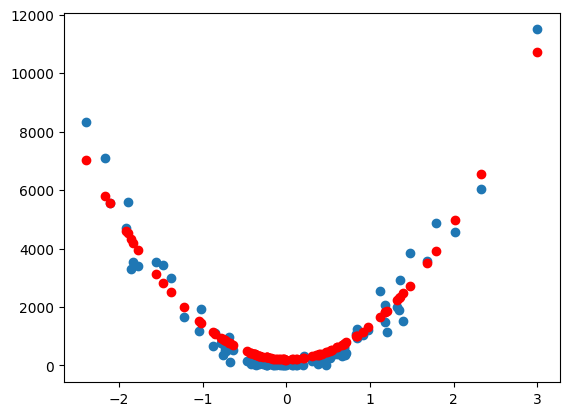

In [28]:
# Faire de nouvelles prédictions avec le modèle entraîné
predictions = model.predict(X)

plt.scatter(X[:,0], y)
plt.scatter(X[:,0], predictions, color='red')


### **Question 8**

8- Refaire le même travail en entraînant votre modèle sur 1000 itérations avec un Learning rate de 0.001.

Précision du modèle avec 1000 itérations : 0.9657424344329963


Text(0.5, 1.0, 'Prédictions du modèle de régression')

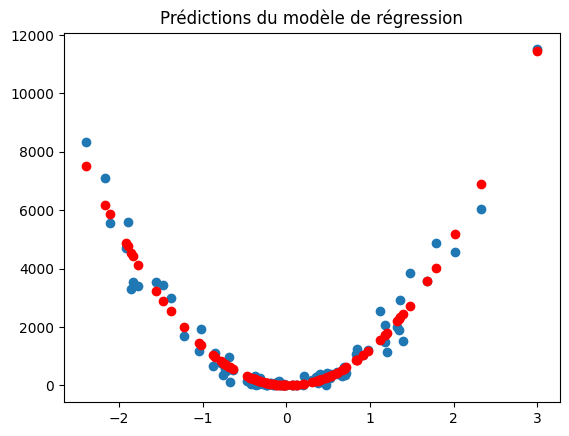

In [29]:
# Définition du modèle avec SGDRegressor
model_1000 = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.001)

# Entraînement du modèle
model_1000.fit(X, y)

# Calculer la précision du modèle
precision_1000 = model_1000.score(X, y)
print("Précision du modèle avec 1000 itérations :", precision_1000)

# Faire de nouvelles prédictions avec le modèle entraîné
predictions_1000 = model_1000.predict(X)

# Tracer les résultats
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], predictions_1000, color='red')
plt.title('Prédictions du modèle de régression')
